### Data available here: https://drive.google.com/uc?export=do...


In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from datetime import timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [2]:
files = ['MORTGAGE30US.csv', 'RRVRUSQ156N.csv', 'CPIAUCSL.csv']
path = '../data/house_prices/'

In [3]:
dfs = [pd.read_csv(path + file, parse_dates=True, index_col=0) for file in files]

In [4]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-07-14,5.51
2022-07-21,5.54
2022-07-28,5.30


In [5]:
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-04-01,6.2
2021-07-01,5.8
2021-10-01,5.6


In [6]:
dfs[2]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474


In [7]:
# Merge dataframes
fed_data = pd.concat(dfs, axis=1)
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2022-07-14,5.51,NaN,NaN
2022-07-21,5.54,NaN,NaN
2022-07-28,5.30,NaN,NaN


In [8]:
# fill missing values with the previous value

fed_data = fed_data.ffill() # forward fill

In [9]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,3.14,5.6,278.524
2021-11-04,3.09,5.6,278.524
2021-11-10,2.98,5.6,278.524
2021-11-18,3.10,5.6,278.524
2021-11-24,3.10,5.6,278.524
2021-12-01,3.10,5.6,280.126
2021-12-02,3.11,5.6,280.126
2021-12-09,3.10,5.6,280.126
2021-12-16,3.12,5.6,280.126


In [10]:
# read in zillow data
# File one has median sale price of houses in the us
# File two has the zillow home value index for the us
zillow_files = ['Metro_median_sale_price_uc_sfrcondo_week.csv', 'Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv']

In [11]:
dfs = [pd.read_csv(path + file) for file in zillow_files]

In [12]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [13]:
# clean up the data
# Pick the first row of data and cut off its first 5 columns
dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs]

In [14]:
# sales price for avergae house sold
dfs[0]

,0
2008-02-02,190000.0
2008-02-09,190000.0
2008-02-16,193000.0
2008-02-23,189900.0
2008-03-01,194900.0
...,...
2022-06-11,370000.0
2022-06-18,375000.0
2022-06-25,370000.0
2022-07-02,370000.0


In [15]:
# House value index
dfs[1]

,0
1996-01-31,108641.264685
1996-02-29,108472.72888
1996-03-31,108532.280074
1996-04-30,108739.077466
1996-05-31,108986.621607
...,...
2022-03-31,344042.433111
2022-04-30,350515.841789
2022-05-31,354717.722904
2022-06-30,357473.327397


In [16]:
# combine the dataframes using a common column

for df in dfs:
    df.index = pd.to_datetime(df.index)
    df['month'] = df.index.to_period('M')

dfs[0]

,0,month
2008-02-02,190000.0,2008-02
2008-02-09,190000.0,2008-02
2008-02-16,193000.0,2008-02
2008-02-23,189900.0,2008-02
2008-03-01,194900.0,2008-03
...,...,...
2022-06-11,370000.0,2022-06
2022-06-18,375000.0,2022-06
2022-06-25,370000.0,2022-06
2022-07-02,370000.0,2022-07


In [17]:
dfs[1]

,0,month
1996-01-31,108641.264685,1996-01
1996-02-29,108472.72888,1996-02
1996-03-31,108532.280074,1996-03
1996-04-30,108739.077466,1996-04
1996-05-31,108986.621607,1996-05
...,...,...
2022-03-31,344042.433111,2022-03
2022-04-30,350515.841789,2022-04
2022-05-31,354717.722904,2022-05
2022-06-30,357473.327397,2022-06


In [18]:
price_data = pd.merge(dfs[0], dfs[1], on='month')
price_data

,0_x,month,0_y
0,190000.0,2008-02,206885.853266
1,190000.0,2008-02,206885.853266
2,193000.0,2008-02,206885.853266
3,189900.0,2008-02,206885.853266
4,194900.0,2008-03,205459.521952
...,...,...,...
749,370000.0,2022-06,357473.327397
750,375000.0,2022-06,357473.327397
751,370000.0,2022-06,357473.327397
752,370000.0,2022-07,357107.271636


In [19]:
price_data.index = dfs[0].index
price_data

,0_x,month,0_y
2008-02-02,190000.0,2008-02,206885.853266
2008-02-09,190000.0,2008-02,206885.853266
2008-02-16,193000.0,2008-02,206885.853266
2008-02-23,189900.0,2008-02,206885.853266
2008-03-01,194900.0,2008-03,205459.521952
...,...,...,...
2022-06-11,370000.0,2022-06,357473.327397
2022-06-18,375000.0,2022-06,357473.327397
2022-06-25,370000.0,2022-06,357473.327397
2022-07-02,370000.0,2022-07,357107.271636


In [20]:
del price_data['month']
price_data.columns = ['price', 'value']

In [21]:
price_data

,price,value
2008-02-02,190000.0,206885.853266
2008-02-09,190000.0,206885.853266
2008-02-16,193000.0,206885.853266
2008-02-23,189900.0,206885.853266
2008-03-01,194900.0,205459.521952
...,...,...
2022-06-11,370000.0,357473.327397
2022-06-18,375000.0,357473.327397
2022-06-25,370000.0,357473.327397
2022-07-02,370000.0,357107.271636


In [22]:
# Drop missing data in fed_data
fed_data = fed_data.dropna()

In [23]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.100
1971-04-09,7.31,5.3,40.100
1971-04-16,7.31,5.3,40.100
1971-04-23,7.31,5.3,40.100
1971-04-30,7.29,5.3,40.100
...,...,...,...
2022-07-14,5.51,5.6,295.271
2022-07-21,5.54,5.6,295.271
2022-07-28,5.30,5.6,295.271


In [24]:
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-04-21,5.11,5.6,288.663
2022-04-28,5.10,5.6,288.663
2022-05-01,5.10,5.6,291.474
2022-05-05,5.27,5.6,291.474
2022-05-12,5.30,5.6,291.474
2022-05-19,5.25,5.6,291.474
2022-05-26,5.10,5.6,291.474
2022-06-01,5.10,5.6,295.328
2022-06-02,5.09,5.6,295.328


In [25]:
# align fed_data and price_data
fed_data.index = fed_data.index + timedelta(days=2)

In [26]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-04,7.33,5.3,40.100
1971-04-11,7.31,5.3,40.100
1971-04-18,7.31,5.3,40.100
1971-04-25,7.31,5.3,40.100
1971-05-02,7.29,5.3,40.100
...,...,...,...
2022-07-16,5.51,5.6,295.271
2022-07-23,5.54,5.6,295.271
2022-07-30,5.30,5.6,295.271


In [27]:
# merge zillow and fed data

price_data = fed_data.merge(price_data, left_index=True, right_index=True)

In [28]:
price_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,price,value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


In [29]:
price_data.columns = ['interest_rate', 'vacancy', 'cpi', 'price', 'value']

In [30]:
price_data

,interest_rate,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


<Axes: >

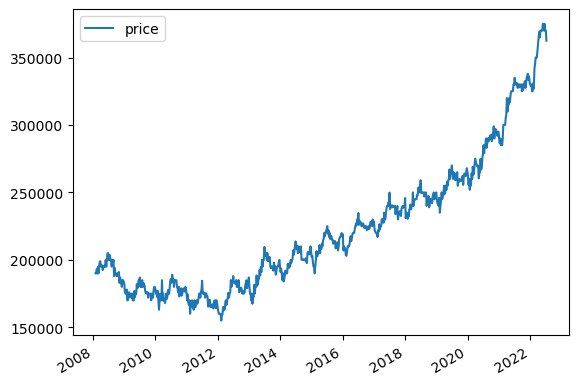

In [31]:
# plot price columns
price_data.plot.line(y='price', use_index=True)

In [32]:
# take out inflation and figure out the real price

price_data['real_price'] = price_data['price'] / price_data['cpi'] * 100

<Axes: >

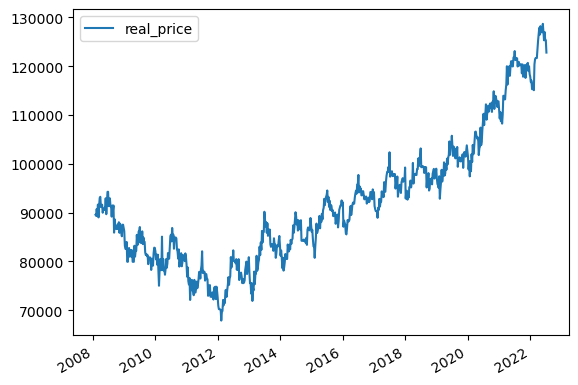

In [33]:
price_data.plot.line(y='real_price', use_index=True)

In [34]:
# Adjust the value column
price_data['adjusted_price'] = price_data['value'] / price_data['cpi'] * 100

In [35]:
price_data['next_quarter_price'] = price_data['adjusted_price'].shift(-13)

In [36]:
price_data

,interest_rate,vacancy,cpi,price,value,real_price,adjusted_price,next_quarter_price
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,94150.220348
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,94150.220348
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,94150.220348
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,94150.220348
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,94150.220348
...,...,...,...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397,125284.429516,121042.815919,None
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397,126977.462347,121042.815919,None
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397,125284.429516,121042.815919,None
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636,125284.429516,120918.867035,None


In [37]:
# drop missing values
price_data.dropna(inplace=True)

In [38]:
price_data

,interest_rate,vacancy,cpi,price,value,real_price,adjusted_price,next_quarter_price
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,94150.220348
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,94150.220348
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,94150.220348
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,94150.220348
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,94150.220348
...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,121042.815919
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,121042.815919
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,121042.815919
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,120918.867035


In [39]:
price_data['change'] = price_data['next_quarter_price'] > price_data['adjusted_price'].astype(int)

In [40]:
price_data

,interest_rate,vacancy,cpi,price,value,real_price,adjusted_price,next_quarter_price,change
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,94150.220348,False
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,94150.220348,False
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,94150.220348,False
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,94150.220348,False
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,94150.220348,False
...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,121042.815919,True
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,121042.815919,True
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,121042.815919,True
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,120918.867035,False


In [41]:
# count the number of times the price increased and decreased
price_data['change'].value_counts()

change
True     515
False    207
Name: count, dtype: int64

In [42]:
predictors = 'interest_rate', 'vacancy', 'adjusted_price', 'adjusted_value'
target = 'change'

In [43]:
target

'change'

In [44]:
START = 260
STEP = 52

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target])
    predictions = rf.predict(test[predictors])
    return predictions

def backtest(data, predictors, target):
    all_predictions = []
    for i in range(START, data.shape(0), STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i+STEP]
        all_predictions.append(predict(train, test, predictors, target))

    predictions = np.concatenate(all_predictions)
    return predictions, accuracy_score(data.iloc[START:][target], predictions)